<a href="https://colab.research.google.com/github/JosuePerezValenzuela/Predict_Survival_Cancer/blob/master/Final_modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankushpanday2/colorectal-cancer-global-dataset-and-predictions")

print("Path to dataset files:", path)

100%|██████████| 3.93M/3.93M [00:01<00:00, 3.20MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday2/colorectal-cancer-global-dataset-and-predictions/versions/1


In [ ]:
import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/ankushpanday2/colorectal-cancer-global-dataset-and-predictions/versions/1/colorectal_cancer_dataset.csv")

df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [ ]:
#Describe las columnas numericas sacando estadisticas basicas
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [ ]:
#Indica cuantos tipos de variables hay para cada columna
#Ejemplo gender indica 2 Male o Female
print(df.nunique())

Patient_ID                    167497
Country                           16
Age                               60
Gender                             2
Cancer_Stage                       3
Tumor_Size_mm                     75
Family_History                     2
Smoking_History                    2
Alcohol_Consumption                2
Obesity_BMI                        3
Diet_Risk                          3
Physical_Activity                  3
Diabetes                           2
Inflammatory_Bowel_Disease         2
Genetic_Mutation                   2
Screening_History                  3
Early_Detection                    2
Treatment_Type                     4
Survival_5_years                   2
Mortality                          2
Healthcare_Costs               78845
Incidence_Rate_per_100K           50
Mortality_Rate_per_100K           25
Urban_or_Rural                     2
Economic_Classification            2
Healthcare_Access                  3
Insurance_Status                   2
S

In [ ]:
df = df.drop(columns=["Incidence_Rate_per_100K", "Mortality_Rate_per_100K", "Economic_Classification"])

In [ ]:
print(df.columns)

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs', 'Urban_or_Rural',
       'Healthcare_Access', 'Insurance_Status', 'Survival_Prediction'],
      dtype='object')


<ipython-input-8-04942622ad3f>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean1 = df_clean1.replace({'Yes': 1, 'No': 0, "M": 1, "F": 0, "Urban": 0, "Rural": 1})


Index(['Age', 'Gender', 'Cancer_Stage', 'Tumor_Size_mm', 'Family_History',
       'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk',
       'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease',
       'Genetic_Mutation', 'Screening_History', 'Early_Detection',
       'Treatment_Type', 'Survival_5_years', 'Urban_or_Rural',
       'Healthcare_Access', 'Survival_Prediction'],
      dtype='object')


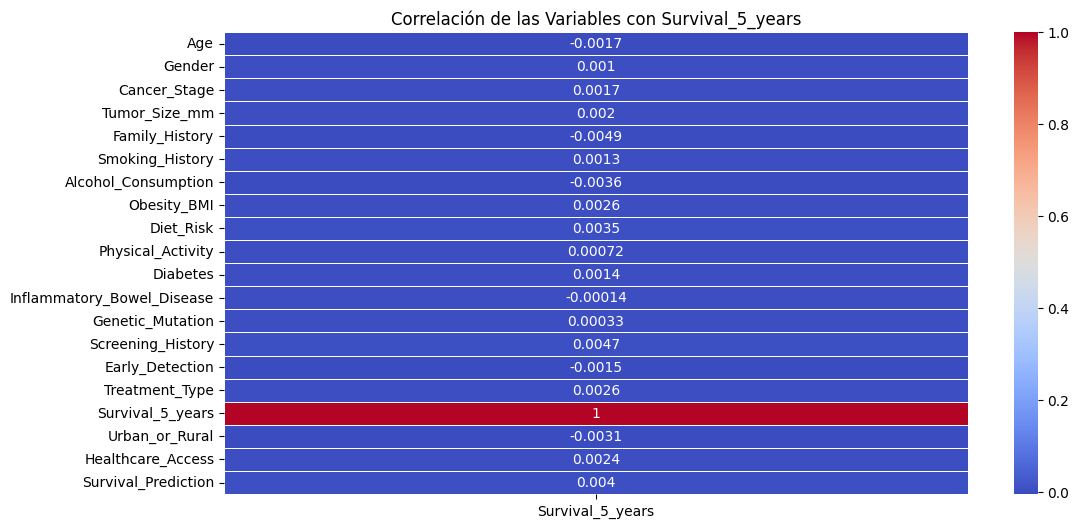

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder

df_clean1 = df.drop(columns=["Patient_ID", "Country", "Healthcare_Costs", "Insurance_Status", "Mortality"])

df_clean1 = df_clean1.replace({'Yes': 1, 'No': 0, "M": 1, "F": 0, "Urban": 0, "Rural": 1})

categorical_cols = ["Cancer_Stage", "Obesity_BMI", "Physical_Activity", "Treatment_Type",
                    "Diet_Risk", "Screening_History", "Healthcare_Access"]

for col in categorical_cols:
    mean_target = df_clean1.groupby(col)['Survival_5_years'].mean()
    df_clean1[col] = df_clean1[col].map(mean_target)

# Calcular la correlación de todas las variables con "Survival_5_years"
correlation_matrix = df_clean1.corr()
print(df_clean1.columns)

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix[['Survival_5_years']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación de las Variables con Survival_5_years")
plt.show()

In [ ]:
X = df_clean1.drop(columns=['Survival_5_years'])
y = df_clean1['Survival_5_years']

# Entrenar modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Obtener importancia de variables
importances = model.feature_importances_
feature_names = X.columns

print(df_clean1.columns)

sorted_indices = np.argsort(importances)[::-1]
print("\nVariables más importantes según Random Forest:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Index(['Age', 'Gender', 'Cancer_Stage', 'Tumor_Size_mm', 'Family_History',
       'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk',
       'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease',
       'Genetic_Mutation', 'Screening_History', 'Early_Detection',
       'Treatment_Type', 'Survival_5_years', 'Urban_or_Rural',
       'Healthcare_Access', 'Survival_Prediction'],
      dtype='object')

Variables más importantes según Random Forest:
Tumor_Size_mm: 0.2194
Age: 0.2014
Treatment_Type: 0.0589
Physical_Activity: 0.0498
Healthcare_Access: 0.0471
Cancer_Stage: 0.0468
Obesity_BMI: 0.0456
Diet_Risk: 0.0445
Screening_History: 0.0444
Early_Detection: 0.0302
Gender: 0.0291
Smoking_History: 0.0283
Urban_or_Rural: 0.0257
Alcohol_Consumption: 0.0251
Survival_Prediction: 0.0241
Diabetes: 0.0225
Family_History: 0.0216
Genetic_Mutation: 0.0189
Inflammatory_Bowel_Disease: 0.0167


In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

# 3 mas influyentes
X = df_clean1[['Tumor_Size_mm','Age','Treatment_Type']]
y = df_clean1['Survival_5_years']
smote = SMOTE(random_state=42)

# 80 y 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.value_counts(normalize=True))

X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Restablecimiento de los indices
X_train_bal = pd.DataFrame(X_train_bal, columns=X_train.columns)
y_train_bal = pd.Series(y_train_bal)
print(y_train_bal.value_counts(normalize=True))

X_train_bal = X_train_bal.astype(float)
X_test = X_test.astype(float)

# Agregar constante a los conjuntos de entrenamiento y prueba
X_train_bal = sm.add_constant(X_train_bal)
X_test = sm.add_constant(X_test)

Survival_5_years
1    0.598625
0    0.401375
Name: proportion, dtype: float64
Survival_5_years
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
# Ajustes
logit_model = sm.Logit(y_train_bal, X_train_bal)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.693122
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Survival_5_years   No. Observations:               160428
Model:                          Logit   Df Residuals:                   160424
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Mar 2025   Pseudo R-squ.:               3.606e-05
Time:                        02:26:04   Log-Likelihood:            -1.1120e+05
converged:                       True   LL-Null:                   -1.1120e+05
Covariance Type:            nonrobust   LLR p-value:                   0.04559
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.7953      2.367     -2.449      0.014     -10.434      -1.157
Tumor_Size_mm    

In [ ]:
y_pred_prob = result.predict(X_test)  # Probabilidades de predicción
y_pred = (y_pred_prob > 0.4).astype(int)  # Convertir a etiquetas 0 o 1

# Evaluación del modelo
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Precisión del Modelo: {accuracy:.4f}")
print("\n🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


🔹 Precisión del Modelo: 0.6022

🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13327
           1       0.60      1.00      0.75     20173

    accuracy                           0.60     33500
   macro avg       0.30      0.50      0.38     33500
weighted avg       0.36      0.60      0.45     33500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


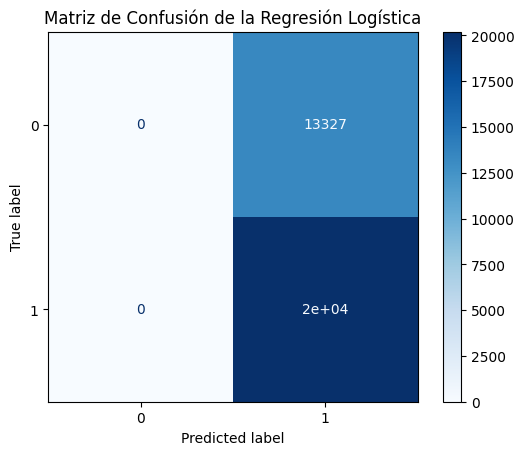

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir probabilidades a predicciones binarias (usando umbral 0.5)
y_pred = (y_pred_prob > 0.4).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión de la Regresión Logística")
plt.show()


In [ ]:
#INTENTO CON XGBoost y SHAP
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score


Xxgboost = df_clean1[['Tumor_Size_mm','Age', 'Cancer_Stage', 'Treatment_Type', 'Physical_Activity', 'Healthcare_Access',
                      'Obesity_BMI', 'Diet_Risk', 'Screening_History', 'Early_Detection', 'Gender', 'Smoking_History',
                      'Urban_or_Rural', 'Alcohol_Consumption', 'Diabetes', 'Family_History', 'Genetic_Mutation',
                      'Inflammatory_Bowel_Disease']]
yxgboost = df_clean1['Survival_5_years']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xxgboost, yxgboost)

# División
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,
                                                    random_state=42, stratify=y_resampled)

# Entrenar modelo
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=8, subsample=0.8,
                              colsample_bytree=0.8, random_state=42, tree_method='gpu_hist')
xgb_model.fit(X_train, y_train)

# Evaluación
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Precisión de XGBoost antes de optimizar con SHAP: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:40:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


🔹 Precisión de XGBoost antes de optimizar con SHAP: 0.6529


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:40:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Tumor_Size_mm                 40155
Age                           40155
Cancer_Stage                  40155
Treatment_Type                40155
Physical_Activity             40155
Healthcare_Access             40155
Obesity_BMI                   40155
Diet_Risk                     40155
Screening_History             40155
Early_Detection               40155
Gender                        40155
Smoking_History               40155
Urban_or_Rural                40155
Alcohol_Consumption           40155
Diabetes                      40155
Family_History                40155
Genetic_Mutation              40155
Inflammatory_Bowel_Disease    40155
dtype: int64


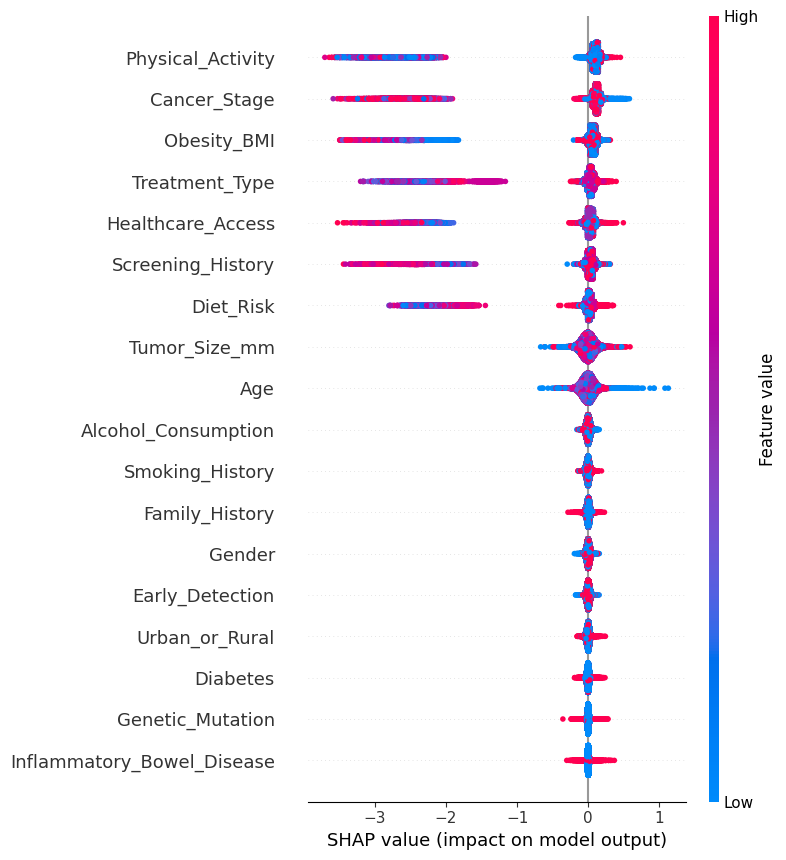

In [ ]:
#APLICACION DE SHAP

import shap
import matplotlib.pyplot as plt

print(X_test.count())

# Objeto SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_test)

# Gráfico de importancia de variables
shap.summary_plot(shap_values, X_test)

<ipython-input-18-3dc8744e41c8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean2 = df_clean2.replace({'Yes': 1, 'No': 0, "M": 1, "F": 0, "Urban": 0, "Rural": 1})
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:41:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:42:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g


🔹 Precisión de XGBoost con Variables SHAP: 0.6543

🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.37      0.52     20078
           1       0.60      0.94      0.73     20077

    accuracy                           0.65     40155
   macro avg       0.73      0.65      0.62     40155
weighted avg       0.73      0.65      0.62     40155



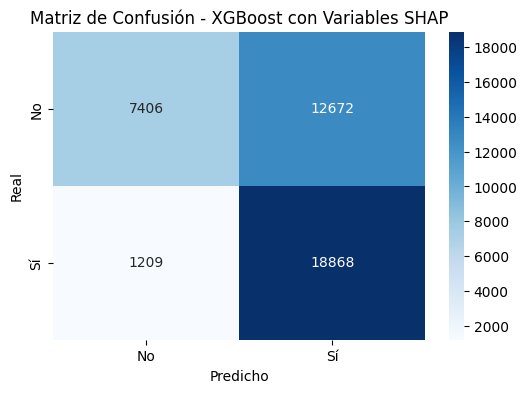

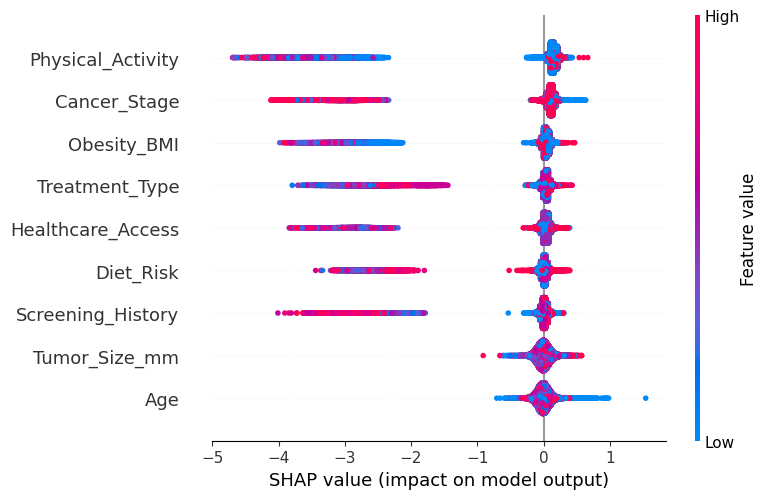

In [ ]:
#Con las columnas de SHAP

df_clean2 = df.drop(columns=["Patient_ID", "Country", "Healthcare_Costs", "Insurance_Status", "Mortality"])

df_clean2 = df_clean2.replace({'Yes': 1, 'No': 0, "M": 1, "F": 0, "Urban": 0, "Rural": 1})

selected_features = [
    "Physical_Activity", "Cancer_Stage", "Obesity_BMI", "Treatment_Type",
    "Healthcare_Access", "Screening_History", "Diet_Risk", "Tumor_Size_mm", "Age"
]

# Aplicar Target Encoding a las variables categóricas
categorical_cols = ["Cancer_Stage", "Obesity_BMI", "Physical_Activity",
                    "Treatment_Type", "Diet_Risk", "Screening_History", "Healthcare_Access"]

for col in categorical_cols:
    mean_target = df_clean2.groupby(col)['Survival_5_years'].mean()
    df_clean2[col] = df_clean2[col].map(mean_target)

# Seleccionar Variables Predictoras y Variable Objetivo
X = df_clean2[selected_features]
y = df_clean2['Survival_5_years']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenar modelo `XGBoost`
xgb_model2 = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=8, subsample=0.8, colsample_bytree=0.8, random_state=42, tree_method='gpu_hist')
xgb_model2.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model2.predict(X_test)

# Evaluación
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\n🔹 Precisión de XGBoost con Variables SHAP: {accuracy_xgb:.4f}")
print("\n🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - XGBoost con Variables SHAP")
plt.show()

# Recalcular SHAP para las nuevas variables
explainer = shap.TreeExplainer(xgb_model2)
shap_values = explainer(X_test)

# Visualizar Importancia de Variables
shap.summary_plot(shap_values, X_test)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#Cargar y limpiar datos
df_clean = df.drop(columns=["Patient_ID", "Country", "Healthcare_Costs", "Insurance_Status", "Survival_5_years"])

df_clean = df_clean.replace({'Yes': 1, 'No': 0, "M": 1, "F": 0, "Urban": 0, "Rural": 1})

categorical_cols = ["Cancer_Stage", "Obesity_BMI", "Physical_Activity", "Treatment_Type",
                    "Diet_Risk", "Screening_History", "Healthcare_Access"]

for col in categorical_cols:
    mean_target = df_clean.groupby(col)['Mortality'].mean()
    df_clean[col] = df_clean[col].map(mean_target)

print(df_clean.columns)

# eleccionar Variables Predictoras y Variable Objetivo
X = df_clean.drop(columns=['Mortality'])  # Variables predictoras
y = df_clean['Mortality']  # Variable a predecir

# Balanceo de clases con `SMOTE`
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


<ipython-input-20-a3b3bb3aa4b9>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.replace({'Yes': 1, 'No': 0, "M": 1, "F": 0, "Urban": 0, "Rural": 1})


Index(['Age', 'Gender', 'Cancer_Stage', 'Tumor_Size_mm', 'Family_History',
       'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk',
       'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease',
       'Genetic_Mutation', 'Screening_History', 'Early_Detection',
       'Treatment_Type', 'Mortality', 'Urban_or_Rural', 'Healthcare_Access',
       'Survival_Prediction'],
      dtype='object')


In [ ]:
# Entrenar modelo `XGBoost`
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=8, subsample=0.8, colsample_bytree=0.8, random_state=42, tree_method='gpu_hist')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:43:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:43:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



🔹 Precisión de XGBoost en `Mortality`: 0.6564

🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.94      0.73     20071
           1       0.86      0.38      0.52     20071

    accuracy                           0.66     40142
   macro avg       0.73      0.66      0.63     40142
weighted avg       0.73      0.66      0.63     40142



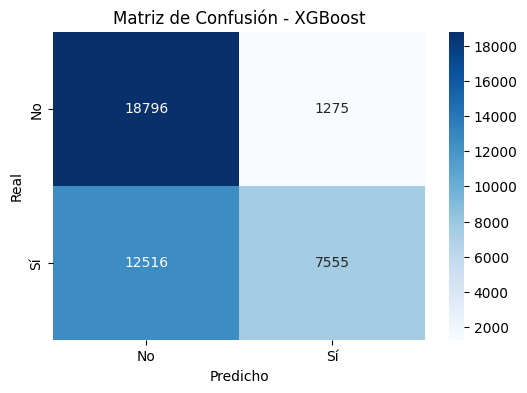

In [ ]:
# Predicciones
y_pred_xgb = xgb_model.predict(X_test)


# Evaluación
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\n🔹 Precisión de XGBoost en `Mortality`: {accuracy_xgb:.4f}")
print("\n🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

In [ ]:
#DISTRIBUCIONES DISCRETAS (Binomial)

#Se necesita la probabilidad de exito de supervivencia de 5 años, esto sera sacado del df
p = df_clean["Survival_5_years"].mean()

print(p)

from scipy.stats import binom

n = 100  # Número de pacientes

# Supervivencia de 60
prob_60 = binom.pmf(60, n, p)

print(f"Probabilidad de que exactamente 60 pacientes sobrevivan: {prob_60:.4f}")

0.5993361075123733
Probabilidad de que exactamente 60 pacientes sobrevivan: 0.0812


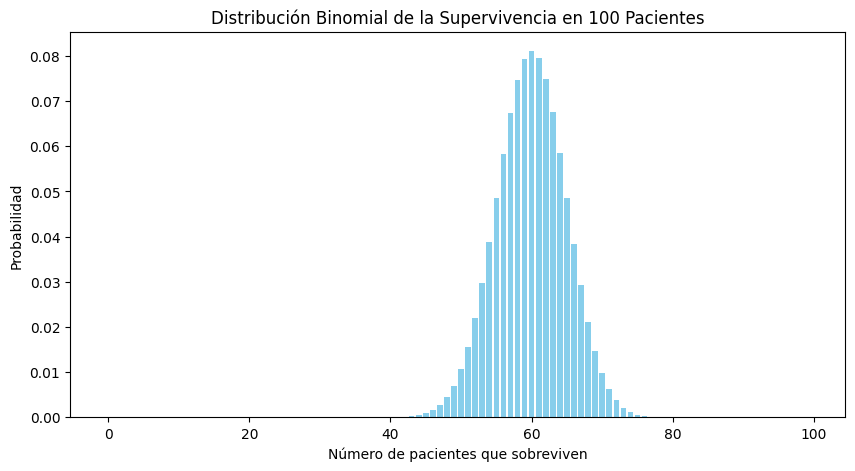

In [ ]:
#Graficos de la distribucion discreta

# 0 a 100 sobrevivientes
x = np.arange(0, 100)
y = binom.pmf(x, n, p)

plt.figure(figsize=(10, 5))
plt.bar(x, y, color="skyblue")
plt.xlabel("Número de pacientes que sobreviven")
plt.ylabel("Probabilidad")
plt.title("Distribución Binomial de la Supervivencia en 100 Pacientes")
plt.show()